#### 공부시간에 따른 점수 예측하기
- 목표:  공부시간으로 점수를 예측
- 데이터셋 : 임의의 생성
- 피처/속성: 공부시간
- 타겟/라벨 : 점수
- 학습방법 : 지도학습  -> 회귀
- 알고리즘 : 선형회귀 <==[조건] 데이터분포가 선형 분포여야 함!

[1] 데이터 준비

In [20]:
import pandas as pd
import matplotlib.pylab  as plt

In [21]:
jumsu=range(7,100,7)
len(jumsu), jumsu[-1]

hour=list(range(1,29,2))
len(hour) , hour, []


(14, [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27], [])

In [22]:
# list  -->  DataFrame 으로 변환
hourDF=pd.DataFrame(hour,columns=['Hour'])
hourDF.head()

jumsuSR=pd.Series(jumsu)
jumsuSR

0      7
1     14
2     21
3     28
4     35
5     42
6     49
7     56
8     63
9     70
10    77
11    84
12    91
13    98
dtype: int64

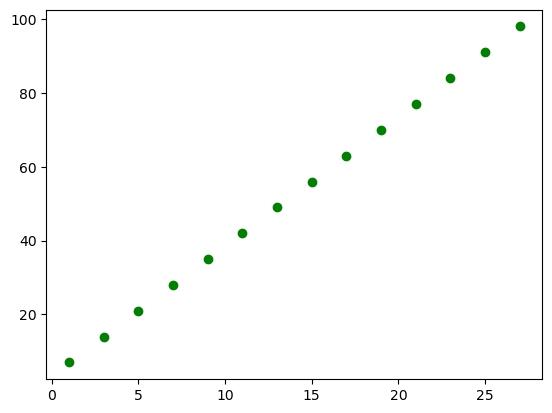

In [36]:
### g현재 데이터의 분포 확인
plt.plot(hourDF,jumsuSR,'go')


[2] 모델 생성 및 학습 진행

In [37]:
# 모듈 로딩 
from sklearn.linear_model import LinearRegression

In [25]:
#   학습 모델 인스턴스 생성
model = LinearRegression()


In [26]:
# 학습진행  => 최대한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기
model.fit(hourDF,jumsuSR)

LinearRegression()

In [27]:
# 학습후 모델 파라미터
print(f' 기울기 : {model.coef_}  절편  : {model.intercept_}')

 기울기 : [3.5]  절편  : 3.500000000000014


In [28]:
# y=ax+b
pre_jumsu= model.coef_[0]*hourDF+ model.intercept_
pre_jumsu.values.reshape(-1)
pre_jumsu.shape

(14, 1)

In [29]:
#  실제 점수와 예측 점수의 차이 확인
real_jumsu= jumsuSR.to_numpy()
real_jumsu - pre_jumsu

ValueError: Unable to coerce to Series, length must be 1: given 14

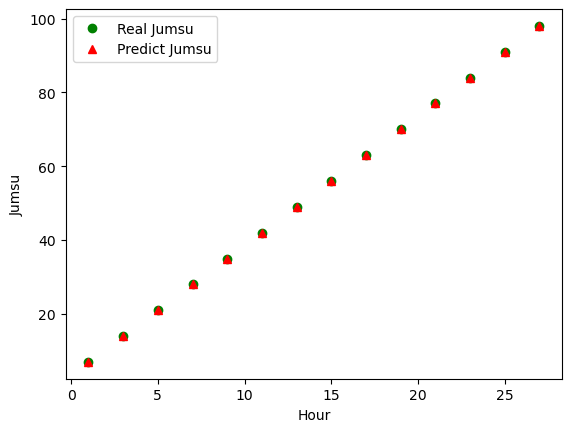

In [38]:
## 현재 데이터와 분포 확인
plt.plot(hourDF, jumsuSR, 'go', label='Real Jumsu')
plt.plot(hourDF, pre_jumsu, 'r^', label='Predict Jumsu')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.legend()
plt.show()

[3] 모델 성능평가

In [ ]:
model.score(hourDF,jumsuSR)

1.0

In [30]:
### 오차/계산 즉. 손실 /비용함수 확인
# - root_mean_squared_error v.1.4 이상
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:

# 버전 확인하는법
import sklearn
sklearn.__version__

'1.3.0'

In [33]:
pre_y = model.predict(hourDF)

In [34]:
mse = mean_squared_error(jumsuSR, pre_y)
rmse= mean_squared_error(jumsuSR, pre_y,squared=False)
mae = mean_absolute_error(jumsuSR, pre_y)
r2=r2_score(jumsuSR, pre_y)

In [35]:
## 손실 / 비용함수 값은 0에 가까울 수록
## 결정계수 값은 1에 가까울 수록 성능 좋은 모델
print(f'mse :{mse}')
print(f'rmse :{rmse}')
print(f'mae :{mae}')
print(f'r2 :{r2}')

mse :6.857455154671224e-29
rmse :8.280975277508818e-15
mae :6.026924990822278e-15
r2 :1.0
